[View in Colaboratory](https://colab.research.google.com/github/trallen91/D-Sigh/blob/master/Project_Part_2.ipynb)

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

!mkdir -p drive
!google-drive-ocamlfuse drive
!ls drive/data
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
!pip install easydict
# !pip install tensorflow
!pip install tensorboard_logger
!pip install -q keras

In [ ]:
from google.colab import files

In [7]:
import torch
import os
import numpy as np
from scipy.sparse import rand as sprand
from scipy.sparse import lil_matrix
from torch.autograd import Variable
import pandas as pd
CUDA_AVAILABLE = torch.cuda.is_available()
if CUDA_AVAILABLE:
  gpus=[0]
  torch.cuda.set_device(gpus[0])
FloatTensor = torch.cuda.FloatTensor if CUDA_AVAILABLE else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if CUDA_AVAILABLE else torch.LongTensor

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pylab as plt

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense

C:\Users\rz336\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

# 1) Preprocessing Data

#### Load Data

In [ ]:
uploaded = files.upload()


#store dataset on google serve as breast_cancer.csv

with open("breast_cancer.csv", 'w') as f:
    f.write(uploaded[(list(uploaded.keys())[0])].decode("utf-8"))

In [ ]:
breast_cancer_data = pd.read_csv('breast_cancer.csv', header=None, names=['id','target','mean radius', 'mean texture', 'mean perimeter', 'mean area',
 'mean smoothness', 'mean compactness', 'mean concavity',
 'mean concave points', 'mean symmetry', 'mean fractal dimension',
 'radius error', 'texture error', 'perimeter error', 'area error',
 'smoothness error', 'compactness error','concavity error',
 'concave points error', 'symmetry error' ,'fractal dimension error',
 'worst radius', 'worst texture', 'worst perimeter', 'worst area',
 'worst smoothness', 'worst compactness' ,'worst concavity',
 'worst concave points' ,'worst symmetry', 'worst fractal dimension'])

In [ ]:
feature_names = np.array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'])

In [4]:
breast_cancer_data.head()

NameError: name 'breast_cancer_data' is not defined

-----------------Jupyter Setup-------------------------

In [6]:
import torch
import os
import numpy as np
from scipy.sparse import rand as sprand
from scipy.sparse import lil_matrix
from torch.autograd import Variable
import pandas as pd
CUDA_AVAILABLE = torch.cuda.is_available()
if CUDA_AVAILABLE:
  gpus=[0]
  torch.cuda.set_device(gpus[0])
FloatTensor = torch.cuda.FloatTensor if CUDA_AVAILABLE else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if CUDA_AVAILABLE else torch.LongTensor

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor


import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pylab as plt

In [7]:
from sklearn.metrics import classification_report as cr

In [8]:
breast_cancer_data = pd.read_csv('data.txt', header=None, names=['id','target','mean radius', 'mean texture', 'mean perimeter', 'mean area',
 'mean smoothness', 'mean compactness', 'mean concavity',
 'mean concave points', 'mean symmetry', 'mean fractal dimension',
 'radius error', 'texture error', 'perimeter error', 'area error',
 'smoothness error', 'compactness error','concavity error',
 'concave points error', 'symmetry error' ,'fractal dimension error',
 'worst radius', 'worst texture', 'worst perimeter', 'worst area',
 'worst smoothness', 'worst compactness' ,'worst concavity',
 'worst concave points' ,'worst symmetry', 'worst fractal dimension'])

feature_names = np.array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'])

-----------end Jupyter setup--------------------

## Preprocessing

#### Check for null values & drop ID column

In [9]:
print(breast_cancer_data.isnull().values.any())

breast_cancer_data.drop('id',axis=1,inplace=True)

False


In [10]:
for x in breast_cancer_data.head(0):
    print (x)

target
mean radius
mean texture
mean perimeter
mean area
mean smoothness
mean compactness
mean concavity
mean concave points
mean symmetry
mean fractal dimension
radius error
texture error
perimeter error
area error
smoothness error
compactness error
concavity error
concave points error
symmetry error
fractal dimension error
worst radius
worst texture
worst perimeter
worst area
worst smoothness
worst compactness
worst concavity
worst concave points
worst symmetry
worst fractal dimension


#### Convert M and B labels into binary 1 and 0, respectively

In [11]:
breast_cancer_data['target'] = breast_cancer_data['target'].map({'M':1,'B':0})

In [12]:
y = breast_cancer_data['target']

In [13]:
# y = np.ravel(breast_cancer_data['target'])

In [14]:
breast_cancer_data.drop('target',axis=1,inplace=True)

In [15]:
len(breast_cancer_data.columns)

30

#### Standardize data

In [16]:
X = pd.DataFrame(preprocessing.scale(breast_cancer_data))
X.columns = list(breast_cancer_data.columns)

In [17]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


#### Split the dataset in train and test at a ratio of 80% to 20% respectively:

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

# 2) Train Models and Evaluate Performance

### k-Nearest Neighbors

In [20]:
def knn(X_train,y_train):
    best_cv_score = 0
    best_cv_k = 0
    model = None 
    for k in range(1,25):
        knn_cv = KNeighborsClassifier(n_neighbors=k)
        scores_cv = cross_val_score(knn_cv, X_train, y_train, scoring='accuracy',cv=10)
        mean_scores_cv = scores_cv.mean()*100

#         print('Mean accuracy with 10-fold cross-validation is %s' % round(mean_scores_cv,2),' k=',k)

        if mean_scores_cv > best_cv_score:
            best_cv_score = mean_scores_cv
            best_cv_k = k
            model_knn = knn_cv
        model_knn.fit(X_train,y_train)
    return model_knn
#     knn_accuracy = model_knn.score(X_test,y_test)

#     return 'knn accuracy ',knn_accuracy

### Support Vector Machine

In [21]:
def svm(X_train,y_train):
    svm_model = SVC()
    svm_model.fit(X_train, y_train) 
    return svm_model
#     svm_score = svm_model.score(X_test, y_test)
#     return 'svm accuracy ',svm_score

### Logistic Regression

In [22]:
def lr(X_train,y_train):
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
#     scores = cross_val_score(lr, X_train, y_train, scoring='accuracy' ,cv=10).mean()
#     print('lr-cross-val-score: '+str(scores))
    return lr
#     return ("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

### Random Forest

In [23]:
def rf(X_train,y_train):
    rf = RandomForestClassifier(n_estimators = 2000, random_state=0)

    rf.fit(X_train,y_train)
    return rf
#     rf_preds = rf.predict(X_test)
#     rf_accuracy = rf.score(X_test,y_test)
#     return('rf_accuracy ',rf_accuracy)

### SCORE + EVALUATE FUNCTIONS

In [24]:
def score(model,X_test,y_test):
    return model.score(X_test,y_test)

In [25]:
def score_report(model,X_test,y_test):
    return str(model)+':\n' + str(cr(y_test,model.predict(X_test)))

In [26]:
def misclassified_vectors(model, X_test, y_test):
    
    preds = model.predict(X_test)
    missed = []
    
    y_test = np.array(y_test)
    X_test_reindex = X_test.reset_index(drop=True)

    for i in range(len(y_test)):
        if y_test[i] != preds[i]:
#             print(str(y_test[i]),str(preds[i]))
            missed.append(np.array(X_test_reindex.loc[i]))
    return missed

            

In [118]:
def misclassified_indices(model, X_test, y_test):
    
    preds = model.predict(X_test)
    missed = []
    
    y_test = np.array(y_test)
#     X_test_reindex = X_test.reset_index(drop=True)

    for i in range(len(y_test)):
        if y_test[i] != preds[i]:
            print('Class:',str(y_test[i]),'Pred:',str(preds[i]))
            missed.append(X_test.index[i])
    return missed


# 3) Feature Selection

In [28]:
malignant = X_train.loc[y_train == 1]

In [29]:
benign = X_train.loc[y_train == 0]

In [30]:
malignant_stats = malignant.describe()

In [31]:
benign_stats = benign.describe()

In [32]:
benign_stats.loc['min',]

mean radius               -1.827998
mean texture              -2.229249
mean perimeter            -1.814389
mean area                 -1.377937
mean smoothness           -3.112085
mean compactness          -1.610136
mean concavity            -1.114873
mean concave points       -1.261820
mean symmetry             -2.353466
mean fractal dimension    -1.551938
radius error              -1.059924
texture error             -1.554264
perimeter error           -1.044049
area error                -0.737829
smoothness error          -1.776065
compactness error         -1.298098
concavity error           -1.057501
concave points error      -1.913447
symmetry error            -1.332263
fractal dimension error   -1.096968
worst radius              -1.572003
worst texture             -2.223994
worst perimeter           -1.571835
worst area                -1.154919
worst smoothness          -2.682695
worst compactness         -1.443878
worst concavity           -1.305831
worst concave points      -1

### Gauss-Distribution 

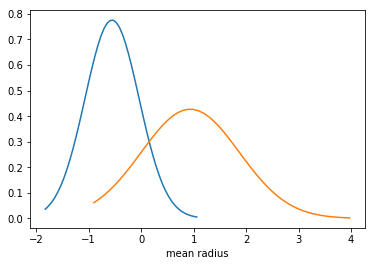

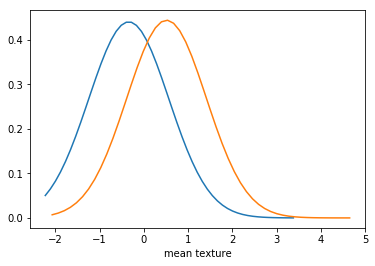

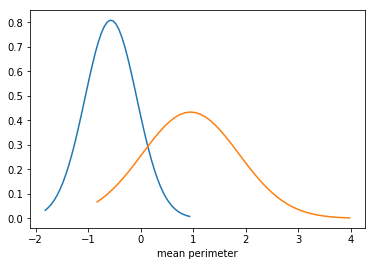

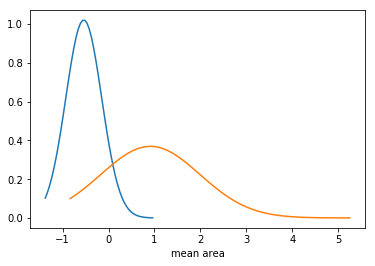

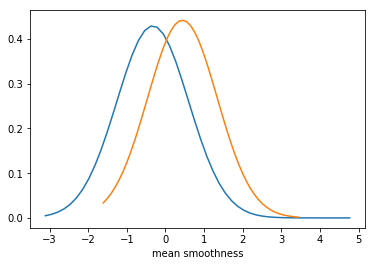

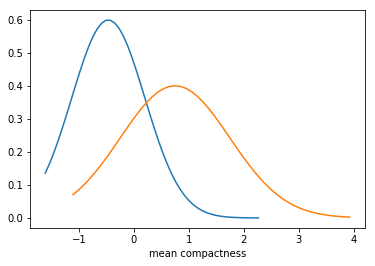

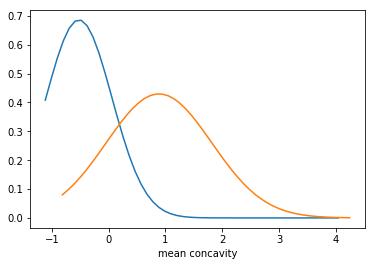

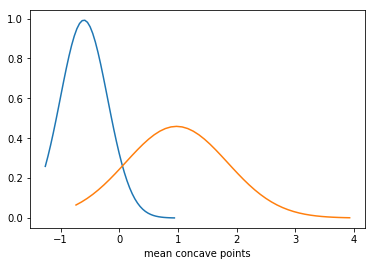

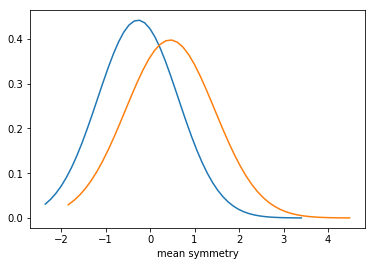

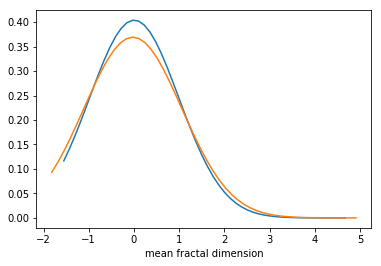

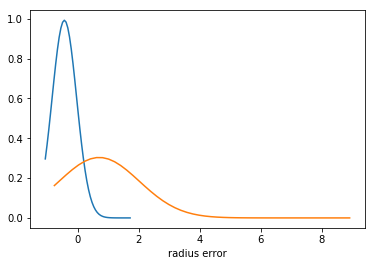

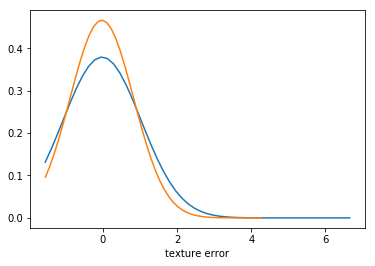

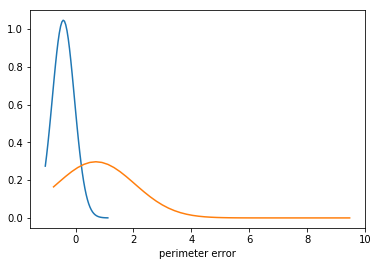

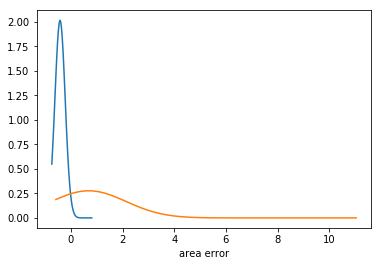

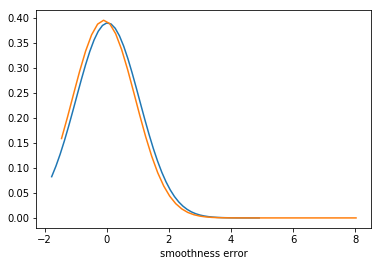

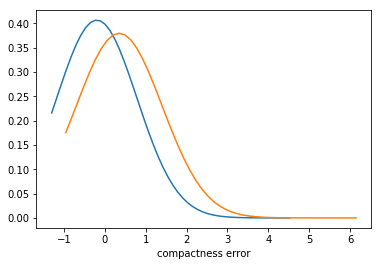

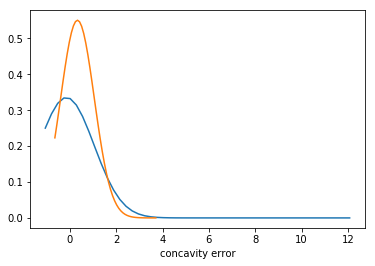

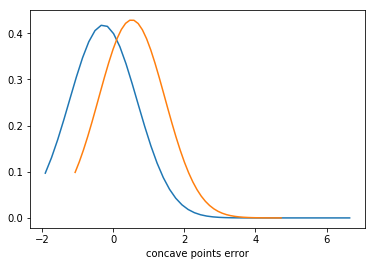

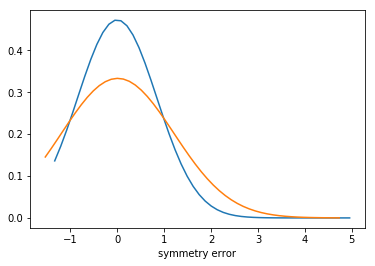

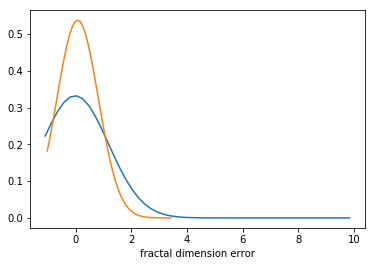

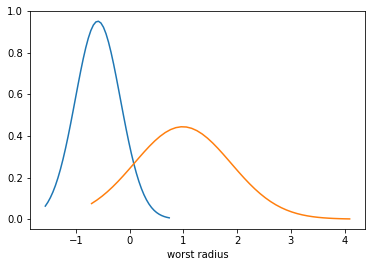

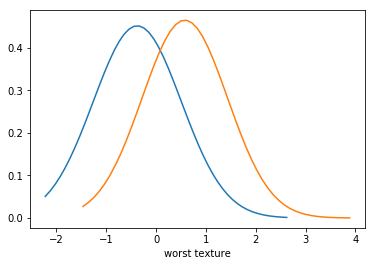

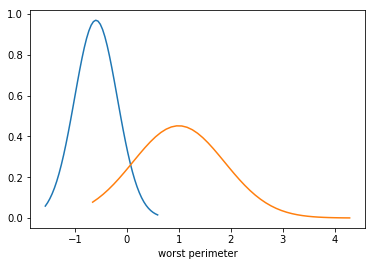

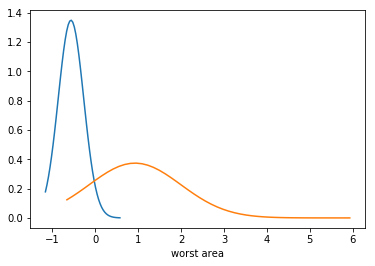

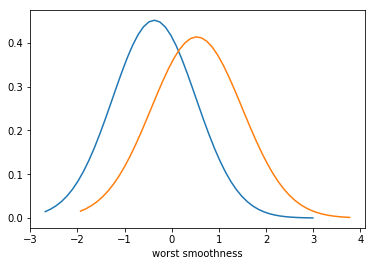

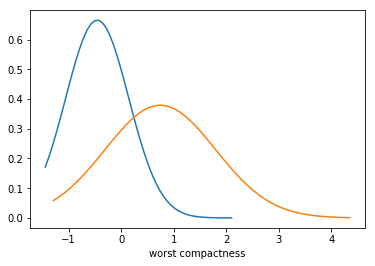

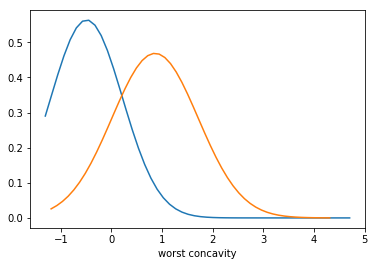

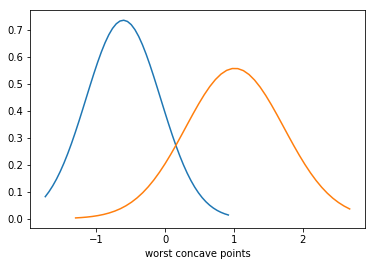

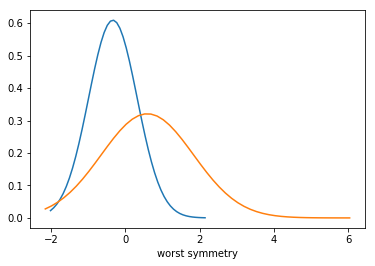

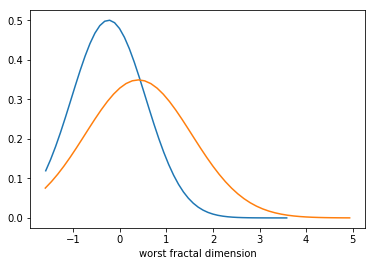

In [33]:
for p in feature_names:
    x_b = np.linspace(benign_stats.loc['min',p],benign_stats.loc['max',p])
    plt.plot(x_b,stats.norm.pdf(x=x_b,loc=benign_stats.loc['mean',p],scale=benign_stats.loc['std',p]))
    
    x_m = np.linspace(malignant_stats.loc['min',p],malignant_stats.loc['max',p])
    plt.plot(x_m,stats.norm.pdf(x=x_m,loc=malignant_stats.loc['mean',p],scale=malignant_stats.loc['std',p]))

#     plt.plot(data_benign[p],stats.norm.pdf(x=data_benign[p],loc=benign_stats.loc['mean',p],scale=benign_stats.loc['std',p]))

#     plt.plot(data_malignant[p],stats.norm.pdf(x=data_malignant[p],loc=malignant_stats.loc['mean',p],scale=malignant_stats.loc['std',p]))
    plt.xlabel(p)
    plt.show()
#     if p == 'mean fractal dimension': 
#         plt.xlabel('Figure 4: '+p)
    
#         plt.savefig('bad.png')
#     if p == 'worst radius': 
#         plt.xlabel('Figure 3: '+p)
# #         plt.savefig('good.png')
#     plt.show()
    

In [34]:
X_train.corrwith(y_train)

mean radius                0.718073
mean texture               0.416213
mean perimeter             0.731859
mean area                  0.695171
mean smoothness            0.375137
mean compactness           0.590554
mean concavity             0.683262
mean concave points        0.778115
mean symmetry              0.348123
mean fractal dimension    -0.014308
radius error               0.540126
texture error             -0.003226
perimeter error            0.529211
area error                 0.517064
smoothness error          -0.058123
compactness error          0.254370
concavity error            0.216047
concave points error       0.380240
symmetry error             0.004723
fractal dimension error    0.041727
worst radius               0.766527
worst texture              0.467479
worst perimeter            0.774998
worst area                 0.722875
worst smoothness           0.430364
worst compactness          0.588884
worst concavity            0.649952
worst concave points       0

### Swarm Plots 

In [35]:
sns.set(color_codes=True)

In [36]:
import seaborn as sns

In [37]:
swarmplot_data = X_train.copy()

In [38]:
# swarmplot_data = X_train.copy(deep=True)

In [39]:
swarmplot_data['target'] = y_train

In [40]:
swarmplot_data.tail(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
71,-1.488033,-1.082004,-1.366651,-1.168611,0.104593,0.924055,-0.034392,-0.521016,0.329977,3.827870,...,-1.629614,-1.331463,-1.048038,-0.511503,-0.067845,-0.617866,-1.016318,-1.046309,1.355149,0
106,-0.706426,-0.223317,-0.691956,-0.689379,1.269571,-0.050051,-0.227236,-0.362899,-0.038768,0.340564,...,0.583433,-0.647878,-0.630885,1.597003,0.074651,0.072498,0.109537,-0.153294,0.389251,0
270,0.046211,-0.574704,-0.068748,-0.063392,-2.282296,-1.470464,-1.023849,-1.100607,-1.108494,-1.281175,...,-0.818652,-0.381891,-0.344521,-2.047074,-1.297121,-1.120358,-1.237560,-0.716282,-1.260478,0
435,-0.041833,0.076875,-0.034972,-0.157532,0.686015,0.169787,0.298817,0.405245,-0.520693,0.374586,...,0.834212,0.197742,-0.019835,1.268234,0.652266,0.646282,1.036837,0.450138,1.194443,1
102,-0.553058,0.286311,-0.607516,-0.557982,-1.155035,-1.212155,-0.815688,-0.805266,-0.265127,-0.854476,...,1.166414,-0.675579,-0.585004,-0.879725,-1.053734,-0.756514,-0.613574,-0.334485,-0.840426,0


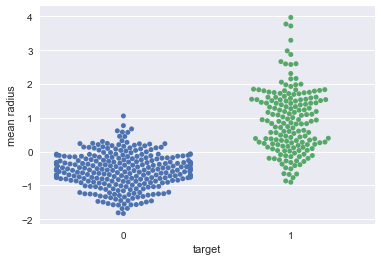

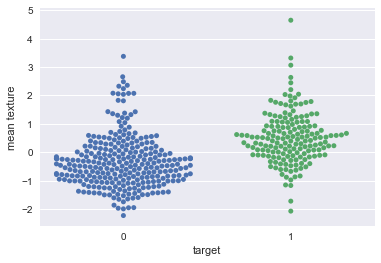

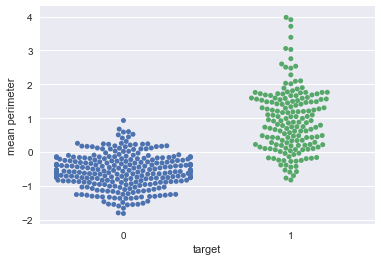

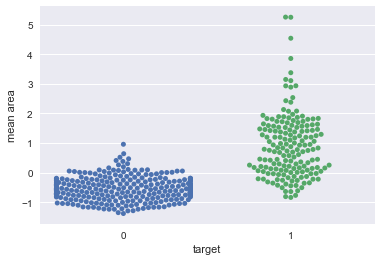

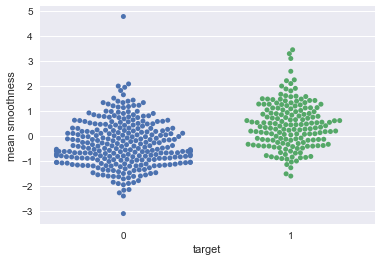

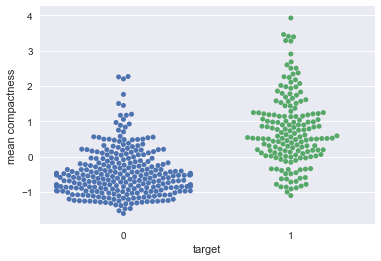

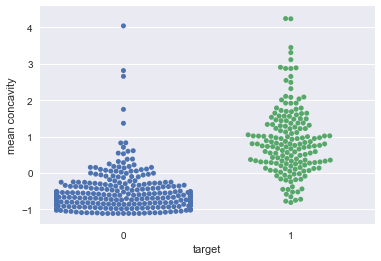

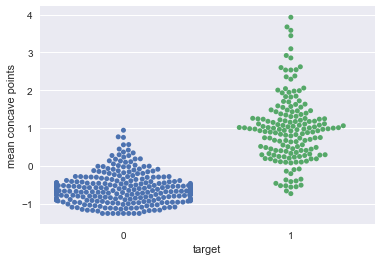

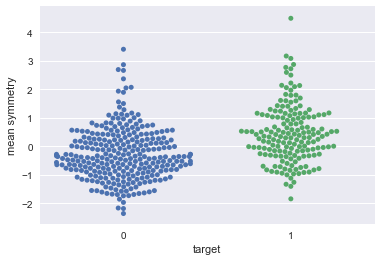

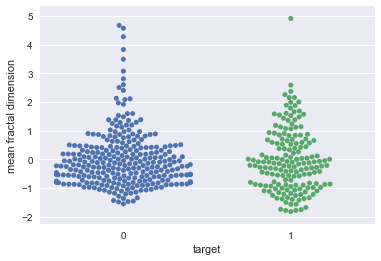

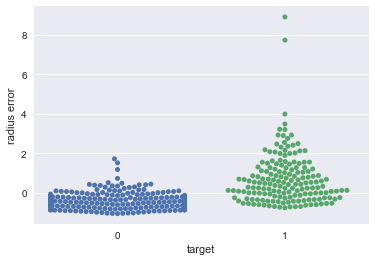

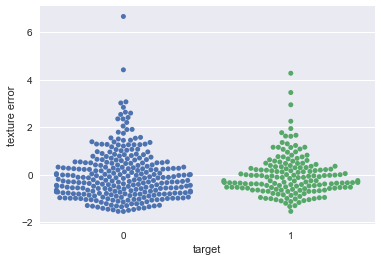

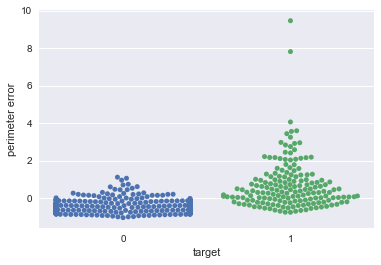

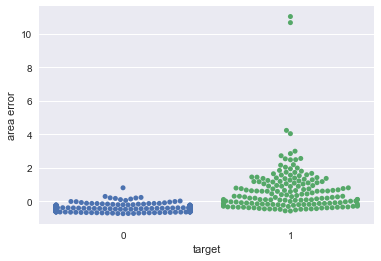

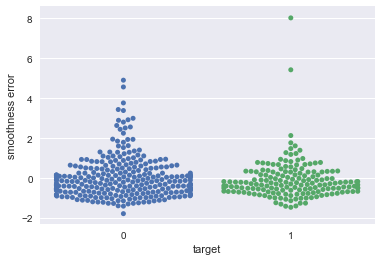

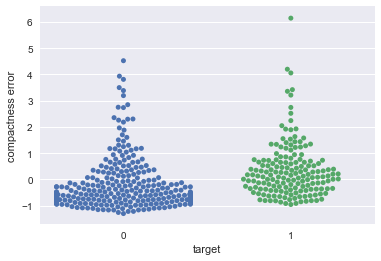

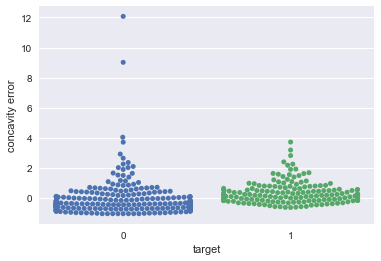

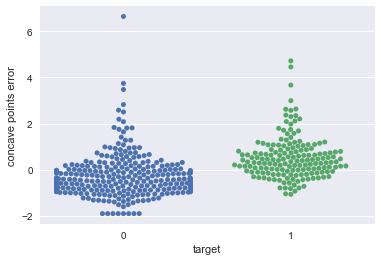

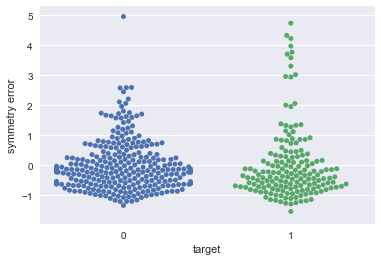

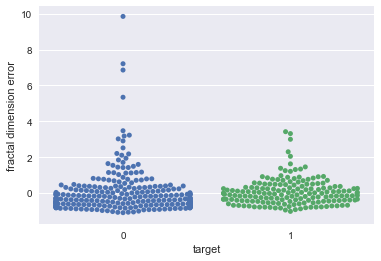

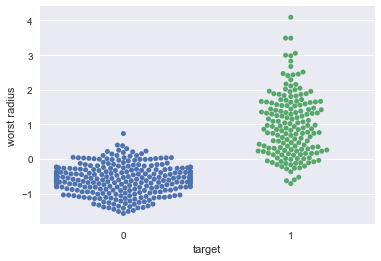

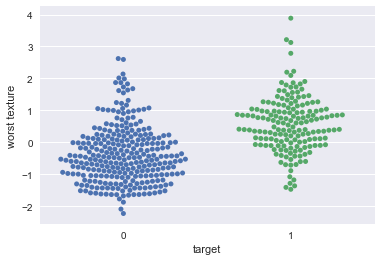

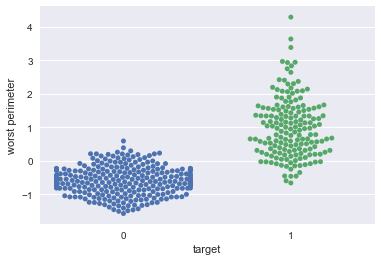

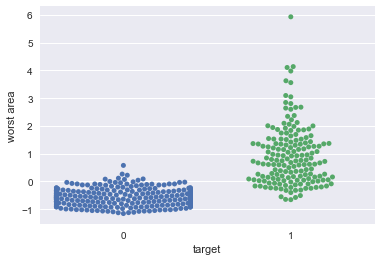

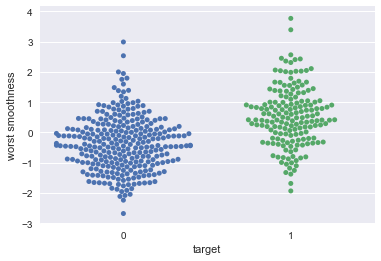

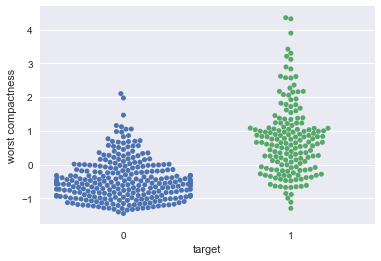

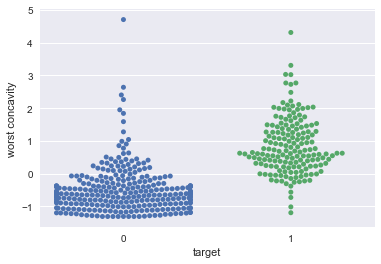

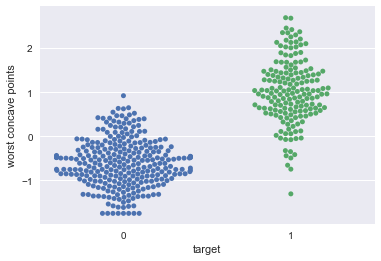

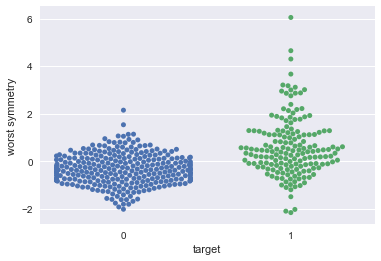

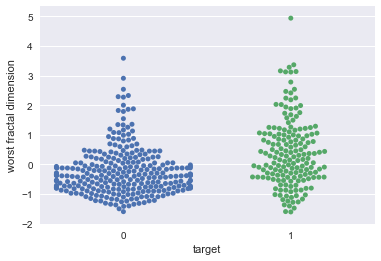

In [41]:
for fn in feature_names:
    _ = sns.swarmplot(y=fn, x='target', data=swarmplot_data)
    plt.show()

# Evaluate Models

In [42]:
for model in [lr,knn,svm,rf]:
    m = model(X_train,y_train)
#     print(str(model)+' accuracy-score: '+str(score(m,X_test,y_test)))
    print(score_report(m,X_test,y_test))
#     print(str(model))
#     print(cr(y_test,m.predict(X_test)))
#     print(str(model)+' accuracy-score: '+str(score(m,X_test,y_test)))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False):
             precision    recall  f1-score   support

          0       0.97      0.99      0.98        71
          1       0.98      0.95      0.96        43

avg / total       0.97      0.97      0.97       114

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

          0       0.96      0.96      0.96        71
          1       0.93      0.93      0.93        43

avg / total       0.95      0.95      0.95       114

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=

In [43]:
id(swarmplot_data) == id(X_train)

False

## Feature Selection

### lr, knn, svm

In [44]:
drop_set = ['mean fractal dimension','texture error','mean smoothness', 'mean symmetry', 'smoothness error', 'compactness error']

In [45]:
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [46]:
keep_set = [a for a in feature_names if a not in drop_set]

In [47]:
X_train_keep = X_train.loc[:,keep_set]
X_test_keep = X_test.loc[:,keep_set]

In [48]:
for model in [lr,knn,svm,rf]:
    m = model(X_train_keep,y_train)
    print(score_report(m,X_test_keep,y_test))
#     print(str(model)+' accuracy-score: '+str(score(m,X_test_keep,y_test)))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False):
             precision    recall  f1-score   support

          0       0.99      0.99      0.99        71
          1       0.98      0.98      0.98        43

avg / total       0.98      0.98      0.98       114

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

          0       0.96      0.97      0.97        71
          1       0.95      0.93      0.94        43

avg / total       0.96      0.96      0.96       114

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter

### PCA

In [49]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
features_pca = pca.transform(X_train)

features_test_pca = pca.transform(X_test)

In [50]:
for model in [lr,knn,svm,rf]:
    m = model(features_pca,y_train)
    print(score_report(m,features_test_pca,y_test))
#     print(str(model)+' accuracy-score: '+str(score(m,features_test_pca,y_test)))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False):
             precision    recall  f1-score   support

          0       0.97      0.99      0.98        71
          1       0.98      0.95      0.96        43

avg / total       0.97      0.97      0.97       114

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

          0       0.96      0.96      0.96        71
          1       0.93      0.93      0.93        43

avg / total       0.95      0.95      0.95       114

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=

### LDA

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

# run an LDA and use it to transform the features
X_lda = lda.fit(X_train, y_train).transform(X_train)
X_test_lda = lda.transform(X_test)

In [52]:
X_test_lda.shape

(114, 1)

In [53]:
for model in [lr,knn,svm,rf]:
    m = model(X_lda,y_train)
    print(score_report(m,X_test_lda,y_test))
#     print(str(model)+' accuracy-score: '+str(score(m,X_test_lda,y_test)))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False):
             precision    recall  f1-score   support

          0       0.97      0.93      0.95        71
          1       0.89      0.95      0.92        43

avg / total       0.94      0.94      0.94       114

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

          0       0.98      0.92      0.95        71
          1       0.88      0.98      0.92        43

avg / total       0.94      0.94      0.94       114

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=

### Random Forest

In [58]:
rf_full = rf(X_train,y_train)

In [60]:
rf_full.feature_importances_

array([0.03773862, 0.01565527, 0.04963278, 0.04138017, 0.00681789,
       0.01241833, 0.04922621, 0.11649567, 0.00379075, 0.00452608,
       0.01380538, 0.00557682, 0.01090395, 0.02916173, 0.00467592,
       0.00483174, 0.00652047, 0.00524147, 0.00497397, 0.00609011,
       0.10491009, 0.0201421 , 0.11786816, 0.10990913, 0.01268302,
       0.01614629, 0.03546591, 0.13317407, 0.01339395, 0.00684396])

In [61]:
# score_report(rf, X_test, y_test)

In [62]:
importance_mean = rf_full.feature_importances_.mean()

In [63]:
importance_mean

0.03333333333333333

In [66]:
keep_set = []

In [67]:
for feature in range(len(rf_full.feature_importances_)):
    if rf_full.feature_importances_[feature] > importance_mean:
        print(feature)
        keep_set.append(feature)

0
2
3
6
7
20
22
23
26
27


In [68]:
keep_set

[0, 2, 3, 6, 7, 20, 22, 23, 26, 27]

In [69]:
rf_f_select = rf(X_train.iloc[:,keep_set],y_train)

In [70]:
print(score_report(rf_f_select,X_test.iloc[:,keep_set], y_test))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False):
             precision    recall  f1-score   support

          0       0.96      0.97      0.97        71
          1       0.95      0.93      0.94        43

avg / total       0.96      0.96      0.96       114



In [161]:
# rf_f_select_accuracy

0.956140350877193

# NN

In [0]:
nn_classifier = Sequential()

nn_classifier.add(Dense(units = 16, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 30))

nn_classifier.add(Dense(units = 16, kernel_initializer = 'he_uniform', activation = 'relu'))

nn_classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

nn_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [86]:
nn_classifier.fit(X_train, y_train, batch_size = 10, epochs = 1000)

Epoch 1/1000
455/455 [==============================] - 0s 491us/step - loss: 0.6748 - acc: 0.7934
Epoch 2/1000
455/455 [==============================] - 0s 139us/step - loss: 0.4561 - acc: 0.9297
Epoch 3/1000
455/455 [==============================] - 0s 138us/step - loss: 0.1922 - acc: 0.9429
Epoch 4/1000
455/455 [==============================] - 0s 144us/step - loss: 0.1183 - acc: 0.9648
Epoch 5/1000
455/455 [==============================] - 0s 140us/step - loss: 0.0922 - acc: 0.9736
Epoch 6/1000
455/455 [==============================] - 0s 173us/step - loss: 0.0795 - acc: 0.9824
Epoch 7/1000
455/455 [==============================] - 0s 142us/step - loss: 0.0718 - acc: 0.9846
Epoch 8/1000
455/455 [==============================] - 0s 164us/step - loss: 0.0667 - acc: 0.9824
Epoch 9/1000
455/455 [==============================] - 0s 140us/step - loss: 0.0621 - acc: 0.9846
Epoch 10/1000
455/455 [==============================] - 0s 140us/step - loss: 0.0590 - acc: 0.9846
Epoch 11/

 10/455 [..............................] - ETA: 0s - loss: 3.4460e-04 - acc: 1.0000455/455 [==============================] - 0s 172us/step - loss: 0.0011 - acc: 1.0000
Epoch 99/1000
455/455 [==============================] - 0s 162us/step - loss: 0.0011 - acc: 1.0000
Epoch 100/1000
455/455 [==============================] - 0s 181us/step - loss: 9.7756e-04 - acc: 1.0000
Epoch 101/1000
455/455 [==============================] - 0s 187us/step - loss: 9.3032e-04 - acc: 1.0000
Epoch 102/1000
455/455 [==============================] - 0s 168us/step - loss: 9.1140e-04 - acc: 1.0000
Epoch 103/1000
455/455 [==============================] - 0s 181us/step - loss: 9.0540e-04 - acc: 1.0000
Epoch 104/1000
455/455 [==============================] - 0s 164us/step - loss: 9.1055e-04 - acc: 1.0000
Epoch 105/1000
455/455 [==============================] - 0s 185us/step - loss: 8.7884e-04 - acc: 1.0000
Epoch 106/1000
455/455 [==============================] - 0s 201us/step - loss: 8.5065e-04 - acc: 1.0

 10/455 [..............................] - ETA: 0s - loss: 3.6336e-06 - acc: 1.0000455/455 [==============================] - 0s 174us/step - loss: 5.3187e-05 - acc: 1.0000
Epoch 192/1000
455/455 [==============================] - 0s 181us/step - loss: 5.1483e-05 - acc: 1.0000
Epoch 193/1000
455/455 [==============================] - 0s 182us/step - loss: 5.0852e-05 - acc: 1.0000
Epoch 194/1000
455/455 [==============================] - 0s 161us/step - loss: 4.7476e-05 - acc: 1.0000
Epoch 195/1000
455/455 [==============================] - 0s 186us/step - loss: 4.6636e-05 - acc: 1.0000
Epoch 196/1000
455/455 [==============================] - 0s 167us/step - loss: 4.6035e-05 - acc: 1.0000
Epoch 197/1000
455/455 [==============================] - 0s 183us/step - loss: 4.4486e-05 - acc: 1.0000
Epoch 198/1000
455/455 [==============================] - 0s 196us/step - loss: 4.1777e-05 - acc: 1.0000
Epoch 199/1000
455/455 [==============================] - 0s 176us/step - loss: 4.2189e-05 -

370/455 [=======================>......] - ETA: 0s - loss: 5.2567e-06 - acc: 1.0000455/455 [==============================] - 0s 181us/step - loss: 4.3777e-06 - acc: 1.0000
Epoch 285/1000
455/455 [==============================] - 0s 168us/step - loss: 4.2442e-06 - acc: 1.0000
Epoch 286/1000
455/455 [==============================] - 0s 193us/step - loss: 4.1303e-06 - acc: 1.0000
Epoch 287/1000
455/455 [==============================] - 0s 167us/step - loss: 4.0431e-06 - acc: 1.0000
Epoch 288/1000
455/455 [==============================] - 0s 187us/step - loss: 4.0261e-06 - acc: 1.0000
Epoch 289/1000
455/455 [==============================] - 0s 192us/step - loss: 3.8867e-06 - acc: 1.0000
Epoch 290/1000
455/455 [==============================] - 0s 177us/step - loss: 3.8169e-06 - acc: 1.0000
Epoch 291/1000
455/455 [==============================] - 0s 188us/step - loss: 3.6710e-06 - acc: 1.0000
Epoch 292/1000
455/455 [==============================] - 0s 187us/step - loss: 3.6417e-06 -

Epoch 378/1000
455/455 [==============================] - 0s 174us/step - loss: 5.2327e-07 - acc: 1.0000
Epoch 379/1000
455/455 [==============================] - 0s 187us/step - loss: 4.9986e-07 - acc: 1.0000
Epoch 380/1000
455/455 [==============================] - 0s 187us/step - loss: 4.9175e-07 - acc: 1.0000
Epoch 381/1000
455/455 [==============================] - 0s 169us/step - loss: 4.7795e-07 - acc: 1.0000
Epoch 382/1000
455/455 [==============================] - 0s 182us/step - loss: 4.6696e-07 - acc: 1.0000
Epoch 383/1000
455/455 [==============================] - 0s 197us/step - loss: 4.6376e-07 - acc: 1.0000
Epoch 384/1000
455/455 [==============================] - 0s 175us/step - loss: 4.5990e-07 - acc: 1.0000
Epoch 385/1000
455/455 [==============================] - 0s 189us/step - loss: 4.3682e-07 - acc: 1.0000
Epoch 386/1000
455/455 [==============================] - 0s 182us/step - loss: 4.2846e-07 - acc: 1.0000
Epoch 387/1000
455/455 [==============================]

310/455 [===================>..........] - ETA: 0s - loss: 1.5030e-07 - acc: 1.0000455/455 [==============================] - 0s 191us/step - loss: 1.4271e-07 - acc: 1.0000
Epoch 473/1000
455/455 [==============================] - 0s 179us/step - loss: 1.4222e-07 - acc: 1.0000
Epoch 474/1000
455/455 [==============================] - 0s 173us/step - loss: 1.4116e-07 - acc: 1.0000
Epoch 475/1000
455/455 [==============================] - 0s 181us/step - loss: 1.4022e-07 - acc: 1.0000
Epoch 476/1000
455/455 [==============================] - 0s 194us/step - loss: 1.3992e-07 - acc: 1.0000
Epoch 477/1000
455/455 [==============================] - 0s 185us/step - loss: 1.3890e-07 - acc: 1.0000
Epoch 478/1000
455/455 [==============================] - 0s 187us/step - loss: 1.3762e-07 - acc: 1.0000
Epoch 479/1000
455/455 [==============================] - 0s 187us/step - loss: 1.3748e-07 - acc: 1.0000
Epoch 480/1000
455/455 [==============================] - 0s 172us/step - loss: 1.3675e-07 -

330/455 [====================>.........] - ETA: 0s - loss: 0.0977 - acc: 0.9939    455/455 [==============================] - 0s 178us/step - loss: 0.0709 - acc: 0.9956
Epoch 566/1000
455/455 [==============================] - 0s 172us/step - loss: 0.0709 - acc: 0.9956
Epoch 567/1000
455/455 [==============================] - 0s 192us/step - loss: 0.0709 - acc: 0.9956
Epoch 568/1000
455/455 [==============================] - 0s 179us/step - loss: 0.0709 - acc: 0.9956
Epoch 569/1000
455/455 [==============================] - 0s 174us/step - loss: 0.0709 - acc: 0.9956
Epoch 570/1000
455/455 [==============================] - 0s 178us/step - loss: 0.0709 - acc: 0.9956
Epoch 571/1000
455/455 [==============================] - 0s 192us/step - loss: 0.0709 - acc: 0.9956
Epoch 572/1000
455/455 [==============================] - 0s 171us/step - loss: 0.0709 - acc: 0.9956
Epoch 573/1000
455/455 [==============================] - 0s 186us/step - loss: 0.0709 - acc: 0.9956
Epoch 574/1000
455/455 

455/455 [==============================] - 0s 181us/step - loss: 7.3450e-07 - acc: 1.0000
Epoch 660/1000
455/455 [==============================] - 0s 185us/step - loss: 7.2438e-07 - acc: 1.0000
Epoch 661/1000
455/455 [==============================] - 0s 184us/step - loss: 7.1224e-07 - acc: 1.0000
Epoch 662/1000
455/455 [==============================] - 0s 182us/step - loss: 7.0232e-07 - acc: 1.0000
Epoch 663/1000
455/455 [==============================] - 0s 181us/step - loss: 6.9237e-07 - acc: 1.0000
Epoch 664/1000
455/455 [==============================] - 0s 170us/step - loss: 6.8445e-07 - acc: 1.0000
Epoch 665/1000
455/455 [==============================] - 0s 191us/step - loss: 6.7234e-07 - acc: 1.0000
Epoch 666/1000
455/455 [==============================] - 0s 185us/step - loss: 6.6448e-07 - acc: 1.0000
Epoch 667/1000
455/455 [==============================] - 0s 168us/step - loss: 6.5494e-07 - acc: 1.0000
Epoch 668/1000
455/455 [==============================] - 0s 181us/ste

 10/455 [..............................] - ETA: 0s - loss: 1.3179e-07 - acc: 1.0000455/455 [==============================] - 0s 184us/step - loss: 3.4937e-07 - acc: 1.0000
Epoch 752/1000
455/455 [==============================] - 0s 172us/step - loss: 3.4622e-07 - acc: 1.0000
Epoch 753/1000
455/455 [==============================] - 0s 190us/step - loss: 3.4482e-07 - acc: 1.0000
Epoch 754/1000
455/455 [==============================] - 0s 189us/step - loss: 3.4162e-07 - acc: 1.0000
Epoch 755/1000
455/455 [==============================] - 0s 182us/step - loss: 3.3885e-07 - acc: 1.0000
Epoch 756/1000
455/455 [==============================] - 0s 171us/step - loss: 3.3553e-07 - acc: 1.0000
Epoch 757/1000
455/455 [==============================] - 0s 192us/step - loss: 3.3282e-07 - acc: 1.0000
Epoch 758/1000
455/455 [==============================] - 0s 196us/step - loss: 3.2946e-07 - acc: 1.0000
Epoch 759/1000
455/455 [==============================] - 0s 182us/step - loss: 3.2811e-07 -

 10/455 [..............................] - ETA: 0s - loss: 1.0768e-07 - acc: 1.0000455/455 [==============================] - 0s 171us/step - loss: 1.6927e-07 - acc: 1.0000
Epoch 846/1000
455/455 [==============================] - 0s 175us/step - loss: 1.6765e-07 - acc: 1.0000
Epoch 847/1000
455/455 [==============================] - 0s 184us/step - loss: 1.6686e-07 - acc: 1.0000
Epoch 848/1000
455/455 [==============================] - 0s 167us/step - loss: 1.6562e-07 - acc: 1.0000
Epoch 849/1000
455/455 [==============================] - 0s 178us/step - loss: 1.6525e-07 - acc: 1.0000
Epoch 850/1000
455/455 [==============================] - 0s 182us/step - loss: 1.6390e-07 - acc: 1.0000
Epoch 851/1000
455/455 [==============================] - 0s 171us/step - loss: 1.6250e-07 - acc: 1.0000
Epoch 852/1000
455/455 [==============================] - 0s 180us/step - loss: 1.6194e-07 - acc: 1.0000
Epoch 853/1000
455/455 [==============================] - 0s 190us/step - loss: 1.6088e-07 -

 10/455 [..............................] - ETA: 0s - loss: 1.0576e-07 - acc: 1.0000455/455 [==============================] - 0s 185us/step - loss: 1.1693e-07 - acc: 1.0000
Epoch 938/1000
455/455 [==============================] - 0s 179us/step - loss: 1.1686e-07 - acc: 1.0000
Epoch 939/1000
455/455 [==============================] - 0s 193us/step - loss: 1.1666e-07 - acc: 1.0000
Epoch 940/1000
455/455 [==============================] - 0s 172us/step - loss: 1.1681e-07 - acc: 1.0000
Epoch 941/1000
455/455 [==============================] - 0s 172us/step - loss: 1.1645e-07 - acc: 1.0000
Epoch 942/1000
455/455 [==============================] - 0s 179us/step - loss: 1.1637e-07 - acc: 1.0000
Epoch 943/1000
455/455 [==============================] - 0s 174us/step - loss: 1.1613e-07 - acc: 1.0000
Epoch 944/1000
455/455 [==============================] - 0s 164us/step - loss: 1.1628e-07 - acc: 1.0000
Epoch 945/1000
455/455 [==============================] - 0s 176us/step - loss: 1.1601e-07 -

In [87]:
y_pred = nn_classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 

cm

array([[70,  1],
       [ 1, 42]])

Confusion matrix
[[70  1]
 [ 1 42]]


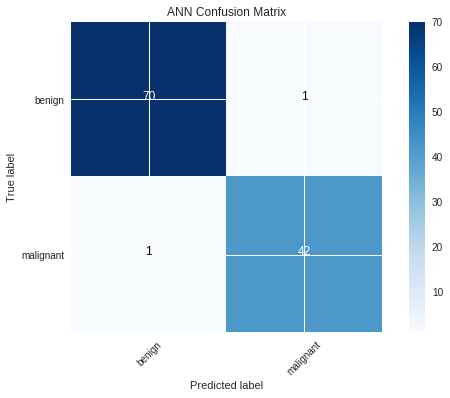

In [88]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Plot non-normalized confusion matrix
class_names = ['benign', 'malignant']

plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='ANN Confusion Matrix')


plt.show()

In [89]:
((cm[0][0] + cm[1][1])/(cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0])) * 100

98.24561403508771

|--------------------------Testing----------------------------------|

In [43]:
test_lr = lr(X_train,y_train)

In [97]:
misclassified_test_lr = misclassified_vectors(test_lr,X_test,y_test)

1 0
1 0
0 1


In [98]:
misclassified_test_lr

[array([-0.0929555 , -0.8143917 , -0.06339309, -0.20133147,  0.30883801,
         0.44837335, -0.13696614,  0.04567738, -0.54624915,  0.40577359,
        -0.45646421, -1.0819902 , -0.45001214, -0.37374478, -0.77469105,
        -0.26984246, -0.47426865, -0.42014527, -1.01007305, -0.25150078,
         0.06229254, -0.78445489,  0.09051283, -0.11985999,  0.38274896,
         0.63572595,  0.02740114,  0.3607756 , -0.50435235,  1.05590311]),
 array([-0.04751323, -0.52118124, -0.02220289, -0.1492844 ,  0.94221044,
         0.4464782 ,  0.11413328,  0.09133273,  0.35188293, -0.21230178,
         0.07156321, -0.7385349 , -0.15002359, -0.1011436 , -0.2300023 ,
         0.07331932, -0.02333314,  0.26340626,  0.00940795, -0.41604011,
         0.02501768, -0.5874139 ,  0.02498398, -0.09595238,  0.82549147,
         0.45760683,  0.23369465,  0.34707166,  0.27056457, -0.24248949]),
 array([ 0.02633046,  1.99205126,  0.02393013, -0.08813619, -1.00558771,
        -0.0083573 ,  0.26994047, -0.12482084, 

In [134]:
misclassified_test_lr_indices = misclassified_indices(test_lr,X_test,y_test)

1 0
1 0
0 1


In [135]:
misclassified_test_lr_indices

[73, 255, 238]

In [138]:
misclass_by_index = []
for a in misclassified_test_lr_indices:
    misclass_by_index.append(np.array(X_test.loc[a]))

In [139]:
misclass_by_index

[array([-0.0929555 , -0.8143917 , -0.06339309, -0.20133147,  0.30883801,
         0.44837335, -0.13696614,  0.04567738, -0.54624915,  0.40577359,
        -0.45646421, -1.0819902 , -0.45001214, -0.37374478, -0.77469105,
        -0.26984246, -0.47426865, -0.42014527, -1.01007305, -0.25150078,
         0.06229254, -0.78445489,  0.09051283, -0.11985999,  0.38274896,
         0.63572595,  0.02740114,  0.3607756 , -0.50435235,  1.05590311]),
 array([-0.04751323, -0.52118124, -0.02220289, -0.1492844 ,  0.94221044,
         0.4464782 ,  0.11413328,  0.09133273,  0.35188293, -0.21230178,
         0.07156321, -0.7385349 , -0.15002359, -0.1011436 , -0.2300023 ,
         0.07331932, -0.02333314,  0.26340626,  0.00940795, -0.41604011,
         0.02501768, -0.5874139 ,  0.02498398, -0.09595238,  0.82549147,
         0.45760683,  0.23369465,  0.34707166,  0.27056457, -0.24248949]),
 array([ 0.02633046,  1.99205126,  0.02393013, -0.08813619, -1.00558771,
        -0.0083573 ,  0.26994047, -0.12482084, 

In [142]:
for a,b in zip(misclass_by_index,misclassified_test_lr):
    misclass_by_index == misclassified_test_lr

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

|---------Testing-----------|

## Visualizations

In [71]:
# from bokeh.plotting import figure, output_file, show
# from bokeh.io import push_notebook, show, output_notebook

In [31]:
# x = [1,2,3,4,5]
# y = [6,7,2,4,5]
# output_notebook()
# p = figure(title="sample title",x_axis_label='dependent',y_axis_label='independent')
# p.line(x,y,legend='Stuff',line_width=5)
# show(p)

Loading BokehJS ...

In [72]:
import plotly

In [73]:
plotly.tools.set_credentials_file(username='reneez',api_key='k3WG3f4AccSxdYefPee5')

In [74]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
68,-1.447987,-0.456023,-1.366651,-1.150124,0.728714,0.700428,2.814833,-0.133333,1.093024,2.503828,...,-1.234044,-0.492965,-1.243893,-0.977194,0.693984,1.159269,4.700669,0.919592,2.147190,1.859432
181,1.977508,1.694187,2.089619,1.866047,1.262455,3.389643,2.007548,2.596960,2.129892,1.585220,...,2.155897,1.270634,2.062335,2.124291,0.733436,3.207003,1.946890,2.675218,1.936879,2.463465
63,-1.407089,-1.263516,-1.349763,-1.120545,-1.362838,-0.318972,-0.363081,-0.699511,1.932741,0.968562,...,-1.296169,-1.049890,-1.241212,-1.002860,-1.490797,-0.550038,-0.635617,-0.970486,0.616770,0.052877
248,-0.987600,1.380033,-0.986877,-0.875668,0.014925,-0.606466,-0.816190,-0.845247,0.311723,0.069801,...,-0.832304,1.549097,-0.872165,-0.746907,0.768505,-0.728158,-0.766109,-0.810759,0.822228,-0.137199
60,-1.123927,-1.026155,-1.129395,-0.975496,1.212639,-0.449737,-0.978777,-0.929077,3.400421,0.964310,...,-1.087016,-1.339752,-1.114026,-0.900022,-0.213419,-0.989865,-1.201820,-1.352369,1.061659,-0.207578


In [75]:
X_train.iloc[0]

mean radius               -1.447987
mean texture              -0.456023
mean perimeter            -1.366651
mean area                 -1.150124
mean smoothness            0.728714
mean compactness           0.700428
mean concavity             2.814833
mean concave points       -0.133333
mean symmetry              1.093024
mean fractal dimension     2.503828
radius error              -0.280696
texture error             -0.041464
perimeter error           -0.485654
area error                -0.498714
smoothness error           0.836041
compactness error          3.385892
concavity error            9.015603
concave points error       3.475158
symmetry error             2.594434
fractal dimension error    2.180277
worst radius              -1.234044
worst texture             -0.492965
worst perimeter           -1.243893
worst area                -0.977194
worst smoothness           0.693984
worst compactness          1.159269
worst concavity            4.700669
worst concave points       0

In [37]:
#use original, un-standardized data (avoid negative values)
#what are metrics?
breast_cancer_data.loc[68]

mean radius                  9.029000
mean texture                17.330000
mean perimeter              58.790000
mean area                  250.500000
mean smoothness              0.106600
mean compactness             0.141300
mean concavity               0.313000
mean concave points          0.043750
mean symmetry                0.211100
mean fractal dimension       0.080460
radius error                 0.327400
texture error                1.194000
perimeter error              1.885000
area error                  17.670000
smoothness error             0.009549
compactness error            0.086060
concavity error              0.303800
concave points error         0.033220
symmetry error               0.041970
fractal dimension error      0.009559
worst radius                10.310000
worst texture               22.650000
worst perimeter             65.500000
worst area                 324.700000
worst smoothness             0.148200
worst compactness            0.436500
worst concav

In [78]:
%matplotlib inline
import matplotlib
import matplotlib
import plotly.graph_objs as go
import plotly.plotly as py
import math

In [79]:
x = 9.029*2
y = 9.029*2
z = 250.500000/(math.pi*math.sqrt(9.029))

In [80]:
trace = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=z,
        colorscale='Viridis',
        opacity=0.8
    )
)

data = [trace]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
        
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)




In [81]:
import hypertools as hyp

C:\Users\rz336\Anaconda3\lib\site-packages\hypertools\plot\plot.py:233: UserWarning:

Group will be deprecated. Please use hue keyword argument. See docs for details: http://hypertools.readthedocs.io/en/latest/hypertools.plot.html#hypertools.plot



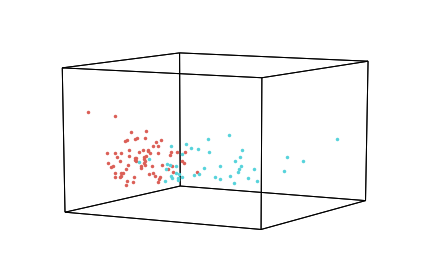

In [82]:
hyp.plot(X_test,'.',group=y_test)

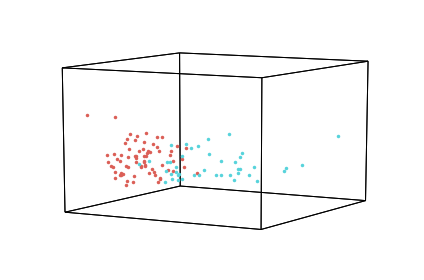

In [117]:
hyp.plot(X_test_arr,'.',hue=y_test_arr,ndims=5,save_path='test_vis_a.png')

In [107]:
y_test_arr = np.array(y_test)

In [102]:
X_test_arr = np.array(X_test)

In [103]:
X_test_arr

array([[-0.47069438, -0.16048584, -0.44810956, ..., -0.19956318,
         0.18320441,  0.19695794],
       [ 1.36687747,  0.47014935,  1.30288585, ...,  0.97897545,
        -0.56582801, -1.00057787],
       [ 0.37850807,  0.04429607,  0.40082046, ...,  0.56024403,
        -0.10314275, -0.20813168],
       ...,
       [-0.74050787, -1.01451947, -0.74550281, ..., -0.28209134,
        -0.3830188 , -0.3245049 ],
       [ 0.02633046,  1.99205126,  0.02393013, ..., -0.49358878,
        -1.63518099, -0.33170895],
       [ 1.87526288,  2.75300221,  1.80128727, ...,  0.78102969,
        -0.05299156, -0.0978542 ]])

C:\Users\rz336\Anaconda3\lib\site-packages\hypertools\tools\describe.py:62: UserWarning:

When input data is large, this computation can take a long time.

C:\Users\rz336\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning:

The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.



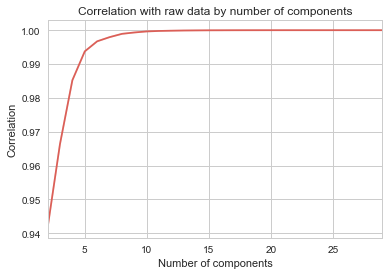

{'average': [0.9415731636437937,
  0.9663317269898698,
  0.9852045969489557,
  0.9937409305257974,
  0.9967153665039078,
  0.9979442679672739,
  0.9989224987106474,
  0.9993278239578354,
  0.9996388842467692,
  0.9997774554666365,
  0.9998498221695914,
  0.9999090053548921,
  0.9999403869893931,
  0.9999664898901018,
  0.999976502140066,
  0.9999867022356728,
  0.9999921332517123,
  0.9999948112414742,
  0.9999969577326638,
  0.9999979902511384,
  0.9999990094639122,
  0.9999994345727984,
  0.999999681569647,
  0.999999861809896,
  0.9999999553195553,
  0.9999999937500803,
  0.9999999991084566,
  0.9999999999789041],
 'individual': [[0.9415731636437937,
   0.9663317269898698,
   0.9852045969489557,
   0.9937409305257974,
   0.9967153665039078,
   0.9979442679672739,
   0.9989224987106474,
   0.9993278239578354,
   0.9996388842467692,
   0.9997774554666365,
   0.9998498221695914,
   0.9999090053548921,
   0.9999403869893931,
   0.9999664898901018,
   0.999976502140066,
   0.999986702235

In [112]:
hyp.describe(X_test_arr)

## Misclassifications

In [121]:
lr_misclassified = misclassified_indices(lr(X_train,y_train),X_test,y_test)

Class: 1 Pred: 0
Class: 1 Pred: 0
Class: 0 Pred: 1


In [122]:
lr_misclassified

[73, 255, 238]

In [123]:
knn_misclassified = misclassified_indices(knn(X_train,y_train),X_test,y_test)

Class: 0 Pred: 1
Class: 1 Pred: 0
Class: 1 Pred: 0
Class: 0 Pred: 1
Class: 1 Pred: 0
Class: 0 Pred: 1


In [124]:
knn_misclassified

[81, 329, 73, 208, 255, 526]

In [125]:
svm_misclassified = misclassified_indices(svm(X_train,y_train),X_test,y_test)

Class: 1 Pred: 0
Class: 0 Pred: 1
Class: 1 Pred: 0


In [126]:
svm_misclassified

[73, 208, 255]

In [127]:
rf_misclassified = misclassified_indices(rf(X_train,y_train),X_test,y_test)

Class: 0 Pred: 1
Class: 1 Pred: 0
Class: 1 Pred: 0
Class: 1 Pred: 0


In [128]:
rf_misclassified

[81, 73, 255, 86]

### Misclass of Feature-selected set

In [132]:
lr_feat_select_misclass = misclassified_indices(lr(X_train_keep,y_train),X_test_keep,y_test)

Class: 1 Pred: 0
Class: 0 Pred: 1


In [133]:
lr_feat_select_misclass

[73, 238]

In [134]:
knn_feat_select_misclass = misclassified_indices(knn(X_train_keep,y_train),X_test_keep,y_test)

Class: 0 Pred: 1
Class: 1 Pred: 0
Class: 0 Pred: 1
Class: 1 Pred: 0
Class: 1 Pred: 0


In [135]:
knn_feat_select_misclass

[81, 73, 208, 255, 86]

In [136]:
svm_feat_select_misclass = misclassified_indices(svm(X_train_keep,y_train),X_test_keep,y_test)

Class: 1 Pred: 0
Class: 1 Pred: 0


In [137]:
svm_feat_select_misclass

[73, 255]

In [138]:
rf_feat_select_misclass = misclassified_indices(rf(X_train_keep,y_train),X_test_keep,y_test)

Class: 0 Pred: 1
Class: 1 Pred: 0
Class: 1 Pred: 0
Class: 1 Pred: 0


In [139]:
rf_feat_select_misclass

[81, 73, 255, 86]